# Text Processing on Haptik Dataset
#### Firstly we will import all the packages required for all the processing required like data cleaning, 
#### data prerocessing, building model

In [42]:
#future imports
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

#Data Cleaning packages
from pandas import read_csv, Series, DataFrame
from numpy import array, ravel
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import TreebankWordTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from wordcloud import WordCloud
import operator

from collections import OrderedDict
from string import punctuation

#Visulaization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Time
import time   

#Model Fitting
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [27]:
#timeit Decorator
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__.upper())
            kw['log_time'][name] = int((te - ts) * 1000)
        else:
            print('%r  %2.2f ms' % \
                  (method.__name__, (te - ts) * 1000))
        return result
    return timed

In [28]:
@timeit
def load_dataset(filepath):
    dataset = read_csv(filepath, encoding = 'UTF-8')
    
    return dataset

train = load_dataset('./train_data.csv')

test = load_dataset('./test_data.csv') 

'load_dataset'  75.14 ms
'load_dataset'  14.66 ms


In [29]:
#separating feature and target variable
@timeit
def feature_target(df):
    feature = df.iloc[:,0]
    target = df.iloc[:,1:]
    return feature, target

X_train, y_train = feature_target(train)
X_test, y_test = feature_target(test)
# X is the Feature while y is the Label

'feature_target'  0.62 ms
'feature_target'  0.43 ms


In [30]:
X_test.head()

0                                Nearest metro station
1                    Pick up n drop service trough cab
2                                I wants to buy a bick
3                                        Show me pizza
4    What is the cheapest package to andaman and ni...
Name: message, dtype: object

In [31]:
def multi_label_binarizer(df):
    """Maps ["T", "F"] to [1, 0] in a given dataframe
    """
    #dfmi.astype(str).applymap(lambda x: '%i' % pd.Series(x).map({'a':0, 'b':1}))
    df = df.astype(str).applymap(lambda x: 1 if x=='T' else 0)
    return df

target = multi_label_binarizer(y_train)
test_target = multi_label_binarizer(y_test)
target

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0,0,0
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,1,0,0
8,0,0,0,0,1,0,0,0,0
9,0,0,0,1,0,0,0,0,0


In [ ]:
def normalized():
    freq = ravel(target.sum(axis = 0))
    freq = dict(zip(target.columns, freq))
    freq = OrderedDict(sorted(freq.items(), key = operator.itemgetter(1)))
    yhist = DataFrame({'label':freq.keys(), 'count':freq.values()})
    yhist['normalized'] = yhist['count']/yhist['count'].sum()
    return yhist

In [33]:
yhist['count']

0     1847
1     2989
2     3087
3     3979
4     4004
5     4591
6     6055
7     7331
8    13504
Name: count, dtype: int64

In [34]:
y_test

,food,recharge,support,reminders,travel,nearby,movies,casual,other
0,F,F,F,F,F,T,F,F,F
1,F,F,F,F,T,F,F,F,F
2,F,F,F,F,F,F,F,F,T
3,T,F,F,F,F,F,F,F,F
4,F,F,F,F,T,F,F,F,F
5,F,F,F,T,F,F,F,F,F
6,F,F,F,F,F,T,F,F,F
7,T,F,F,F,F,F,F,F,F
8,F,F,F,F,F,F,T,F,F
9,F,F,F,T,F,F,F,F,F


#### now we will work on train_feature dataframe


In [35]:
X_train.head(10)

0                                      7am everyday
1                                    chocolate cake
2    closed mortice and tenon joint door dimentions
3                               train eppo kelambum
4      yesterday i have cancelled the flight ticket
5                          chamge it to 12pm to 9pm
6                        i want too going rajasthan
7                                              room
8            can you please arrange flight tickets?
9                             what kind of reminder
Name: message, dtype: object

In [36]:
type(X_train)

pandas.core.series.Series

In [37]:
X_train.head()

0                                      7am everyday
1                                    chocolate cake
2    closed mortice and tenon joint door dimentions
3                               train eppo kelambum
4      yesterday i have cancelled the flight ticket
Name: message, dtype: object

In [38]:
#stop word removal 
sw_curated = ['a9c0', 'f0af5ee2b89b', '676951', 'hi', '727893', '55616', 'task_nam',
             'user_id', '50', '16', 'exotel','ok', 'haptik', 'nearbi',
             'api_nam', 'offset', 'user_id', '00', 'pleas', 'can', 'pl',
             'drink_water', 'reminer_list', 'trains_api', 'product_id',
             'I', 'j', 'se', 'sl', '10', 'hai', 'll', 'kya', 'rs', 'sorri',
             'know', '30', 'one', '10 00', 'bu', 'reminder_list',
             'plz', 'everi']

@timeit

    
def preprocess(X):
    #create english stop word list
    en_stop = get_stop_words('en')
    stemmer = PorterStemmer()
    tokenize = TreebankWordTokenizer()
    
    X = X.apply(lambda row: row.lower())
    X = X.apply(lambda row: tokenize.tokenize(row)) # do tokenization
    X = X.apply(lambda row: [i for i in row if i not in en_stop]) # remove english stop words
    X = X.apply(lambda row :[i for i in row if i not in punctuation]) #remove punctuation
    X = X.apply(lambda row:[stemmer.stem(word) for word in row])      #porter Stemmer 
    X = X.apply(lambda row: [i for i in row if i not in sw_curated])  #remove sw_curated string from X
    return X

X_train = preprocess(X_train)
X_test = preprocess(X_test)
X_train.head()

'preprocess'  9572.20 ms
'preprocess'  2119.17 ms


0                                [7am, everyday]
1                                 [chocol, cake]
2    [close, mortic, tenon, joint, door, diment]
3                        [train, eppo, kelambum]
4            [yesterday, cancel, flight, ticket]
Name: message, dtype: object

In [15]:
# Count Vectorizer
@timeit
def count_vector(X_train, X_test):
    vect = CountVectorizer(ngram_range=(1, 2), min_df=2, max_df=0.5)
    X_train = Series([' '.join(x) for x in X_train])
    X_test = Series([' '.join(x) for x in X_test])
    train_dtm = vect.fit_transform(X_train)
    test_dtm = vect.transform(X_test)
    return train_dtm, test_dtm

train_dtm, test_dtm = count_vector(X_train, X_test)

'count_vector'  1240.81 ms


In [16]:
train_dtm

<40659x18450 sparse matrix of type '<type 'numpy.int64'>'
	with 212164 stored elements in Compressed Sparse Row format>

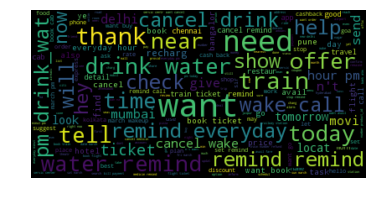

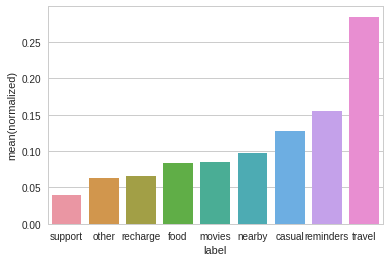

In [44]:
# wordCloud for visualization

def wordCloud(X_train):
    text = []
    for i in range(len(X_train)):
        text = text + [i for i in X_train[i]]
    textall = " ".join(text)
    wordcloud = WordCloud(max_font_size=40).generate(textall)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    return plt.show()

wordCloud(X_train)
    
def yhist_plot(yhist):
    sns.set_style("whitegrid")
    ax = sns.barplot(x="label", y="normalized", data=yhist)
    return plt.show()

yhist_plot(yhist)

In [24]:
print(train_dtm.shape)
print(test_dtm.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.shape)
print(X_test.shape)

(40659, 18450)
(10000, 18450)
(40659, 9)
(10000, 9)
(40659,)
(10000,)


In [ ]:
train_dtm

In [ ]:
test_dtm

In [45]:
@timeit
def Mnb(train1, train2, test1, test2):
    nb = MultinomialNB()
    nb.fit(train1, train2)
    prediction = nb.predict(test1)
#     print (prediction.shape)
#     print (test2.shape)
    return accuracy_score(test2, prediction)
    
Mnb(train_dtm, y_train, test_dtm, y_test)

ValueError: bad input shape (40659, 9)

In [ ]:
print (train_dtm.shape)
print (test_dtm.shape)

In [ ]:
for i in [train_dtm, y_train, test_dtm, y_test]:
    print ( type(i), i.shape)

In [ ]:
y_test.shape

In [ ]:
prediction.shape